Sample testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

(31,)


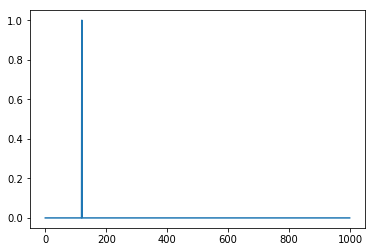

In [2]:
#setup

mockrho = [0]*1000
mockrho[120]=1

#mockrho[320]=1
#for j in range(100):
 #   mockrho[j]=1

Nt=31
Nw=1000;

wmin=0.0001;
wmax=6.;
dw=(wmax-wmin)/Nw;

#Kernel=np.array([[  (1./2. if w == 0 or w== Nw-1 else 1.) * 
#                    dw*np.exp(-(wmin+dw*w)*t)
#                  for w in range(Nw) ] for t in range(1,Nt+1)]);

Kernel=np.array([[  (1./2. if w == 0 or w== Nw-1 else 1.) * 
                    dw*2*w/(w**2+t**2)
                  for w in range(Nw) ] for t in range(1,Nt+1)]);


DataIdeal = np.dot(Kernel,mockrho)

print(DataIdeal.shape)
#plt.yscale('log')
#plt.plot(DataIdeal)
plt.plot(mockrho)

In [3]:
NoisyData = [0]*Nt

#standard deviation scaling
K=0.01
Nmeas =1000

for i in range(Nt):
    NoisyData[i]=(np.random.normal(loc=DataIdeal[i],scale=DataIdeal[i]*K*np.sqrt(Nmeas),size=Nmeas))
    
#print(NoisyData)


(array([  4.,  21.,  63., 154., 228., 248., 175.,  79.,  23.,   5.]),
 array([-9.90997862e-06,  1.15562459e-05,  3.30224703e-05,  5.44886948e-05,
         7.59549193e-05,  9.74211438e-05,  1.18887368e-04,  1.40353593e-04,
         1.61819817e-04,  1.83286042e-04,  2.04752266e-04]),
 <a list of 10 Patch objects>)

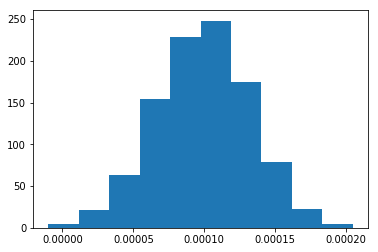

In [4]:
plt.hist(NoisyData[1])

In [5]:
DataAverage = [0]*len(NoisyData)
Variance= [0]*len(NoisyData)

for j in range(len(NoisyData)):
    DataAverage[j]=np.mean(NoisyData[j])
    Variance[j] = np.var(NoisyData[j])
    
print(DataAverage)
print(Variance)

[9.811110988729357e-05, 9.972356475121039e-05, 9.98477940054277e-05, 9.989880510454966e-05, 9.937020281801e-05, 0.00010102832846587495, 9.973360964636367e-05, 9.951442981506999e-05, 9.968453960567487e-05, 9.834119825471427e-05, 0.00010095416974417642, 9.968321662776514e-05, 9.79668532029956e-05, 9.932156637456643e-05, 9.792201099889102e-05, 9.681827291406727e-05, 9.768931543211185e-05, 9.780454210174422e-05, 9.582932765681485e-05, 9.781094352150196e-05, 9.798403958923402e-05, 9.58305673234586e-05, 9.79156384577632e-05, 9.557847288222635e-05, 9.597645702133e-05, 9.604153132642537e-05, 9.629258218877556e-05, 9.429671395206096e-05, 9.560785291384771e-05, 9.386892606660037e-05, 9.319800977564432e-05]
[9.79853121828547e-10, 1.0876024216284242e-09, 1.002539198370902e-09, 1.0241376248254339e-09, 9.490928579528911e-10, 9.84674609063457e-10, 1.02307647568388e-09, 9.702721469086427e-10, 9.490706127785747e-10, 1.0421935231381765e-09, 1.0535528172197069e-09, 9.34079636215828e-10, 9.965924488525687

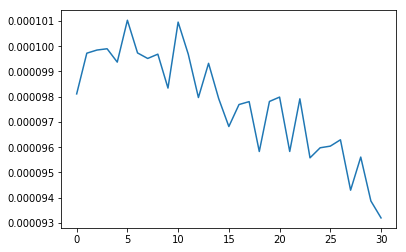

In [6]:
#plt.yscale('log')
plt.plot(DataAverage)
#plt.plot(DataIdeal)

In [7]:
AutoCorrelationCorr=1.; 

#standard covariance expression
DataCovarianceMatrix=AutoCorrelationCorr*np.array([[ sum( np.array([ ( NoisyData[i][n]-DataAverage[i] )*
                                     ( NoisyData[j][n]-DataAverage[j] )/((Nmeas-1.)*Nmeas) for n in range(Nmeas)]) )
                  for i in range(Nt) ] for j in range(Nt)]);
print(DataCovarianceMatrix.shape)
print(DataCovarianceMatrix)

(31, 31)
[[ 9.80833956e-13 -3.00855883e-14 -4.57276119e-14 -1.09968596e-14
   2.77978631e-14  3.24416295e-14  4.13355967e-14 -1.91946743e-15
   3.40480378e-14  2.37480045e-14  2.17559196e-14 -1.00838546e-14
   5.21071713e-14 -7.18288983e-14 -4.28087411e-15  2.87007104e-14
   1.03555479e-14  3.70490671e-15  6.69365236e-15  2.59210285e-14
  -7.31001241e-15  3.88003783e-14 -3.14318827e-14  4.64573503e-14
  -1.60316727e-14  3.06291114e-14 -1.84817454e-14 -4.61664025e-14
   3.25657021e-14 -4.96982558e-15 -7.31889419e-14]
 [-3.00855883e-14  1.08869111e-12 -2.23530599e-14 -4.45589254e-14
  -1.78989449e-14  1.47262174e-15  7.30618606e-16  4.82782406e-14
   3.35972492e-14 -2.09566781e-14  3.61563985e-14  2.54118839e-14
   1.65947660e-14  7.86400968e-14  7.16701152e-15  2.29077588e-14
  -6.73792438e-15 -1.09692784e-14 -3.92785665e-14 -3.74727228e-15
  -2.42300740e-14  2.71851278e-15  2.54427663e-14  5.45547972e-14
   5.66649655e-14  2.94328932e-14  2.14985805e-14  3.03703660e-15
   3.37844668e-1

In [8]:
#linalg.eig()returns two objectes diagonal e-value matrix and e-vector matrices
DiagCorrVar,UInv=np.linalg.eig(DataCovarianceMatrix)
print(  UInv.conj().T @ DataCovarianceMatrix @ UInv )


#Transformed varibles
DCDataAvg= UInv.conj().T @ DataAverage;
print(DCDataAvg)

DCKernel= UInv.conj().T @ Kernel;
print(DCKernel)

print(np.sqrt(DiagCorrVar)) 

[[ 1.32070525e-12  5.48652760e-28  1.28426555e-27 -2.90300813e-28
   7.25752033e-28  4.89093761e-29  3.97684504e-28  3.20593072e-27
   1.02709690e-27  1.97688543e-27  3.09233475e-28  1.39628380e-28
   1.10440527e-29  1.67238512e-28 -2.54407642e-28 -6.62643160e-28
  -6.62643160e-29 -1.79860286e-28 -3.54987407e-28 -1.08073944e-28
   3.25799554e-28 -9.27700425e-28  3.98374757e-29 -4.85543887e-28
  -8.83524214e-28 -1.08862805e-28  1.26217745e-29 -4.22040584e-28
   1.10440527e-28  6.64220882e-28 -4.73316543e-29]
 [ 3.99163618e-28  1.25167511e-12 -8.89046240e-28 -7.03663927e-28
  -9.92387019e-28 -7.88860905e-29  7.04847219e-28 -2.54486528e-27
   2.41391437e-28  1.95637504e-28  1.45150407e-28  1.38050658e-28
  -1.75127121e-28 -2.00370670e-28  4.89685407e-28  8.26726229e-28
   4.51228438e-28  1.45939267e-28 -2.76101317e-29  5.38791998e-28
   5.62457825e-28  4.18096280e-28 -1.70393956e-28  1.13398755e-28
  -4.61483630e-28  1.68027373e-28  1.51461294e-28 -4.38409448e-28
   3.62876016e-29 -1.7670

True


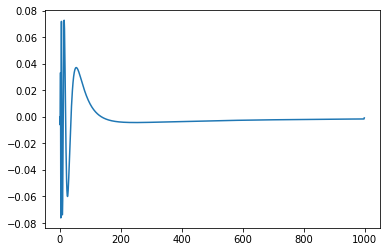

In [10]:
def L(rho, *args):
    data=args[0]
    kernel = args[1]
    sigma = args[2]
    distance = 0
    costf = 0
    rhodat = kernel@rho
    di = [0]*len(data)
    
    for i in range(len(data)):
        di[i]=((data[i]-rhodat[i])**2)/(sigma[i]**(2))
    distance = 0.5*sum(di)
    
    return distance 

def LDer(rho, *args):
    data=args[0]
    kernel = args[1]
    sigma = args[2]
    rhodat = kernel@rho
    
    gradient=[0]*len(rho)
    
    for j in range(len(rho)):
        
        tmp=0;
        
        
        for i in range(len(data)):
            tmp +=((data[i]-rhodat[i]))/(sigma[i]**(2))*(-kernel[i,j])
        gradient[j]=tmp
    
    return np.asarray(gradient)


testrho = [0]*1000

#testrho[130]=1

#for j in range(200):
#    mockrho[j]=1


#bnds = [(0, None)]*1000

result = optimize.minimize(L, x0=testrho , args=(DCDataAvg,DCKernel,np.sqrt(DiagCorrVar)),method='L-BFGS-B',jac='2-point', bounds = None, options={'gtol':1e-12,'ftol':1e-12,'maxfun':1000000,'disp':True})
#result = optimize.minimize(L, x0=testrho , args=(DCDataAvg,DCKernel,np.sqrt(DiagCorrVar)),method='L-BFGS-B',jac=LDer, options={'gtol':1e-12,'ftol': 1e-12,'disp':True})



#print(result)
plt.plot(result.x)
#plt.plot(mockrho)
print(result.success)

In [11]:
print(L(result.x,DCDataAvg,DCKernel,np.sqrt(DiagCorrVar)))

9.58231057334633


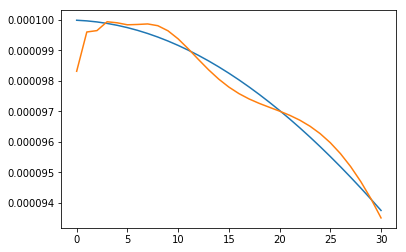

In [12]:
#plt.yscale('log')
plt.plot(DataIdeal)
plt.plot(np.dot(Kernel,result.x))
#plt.plot(np.dot(Kernel,testrho))

In [ ]:
h=1

rho1 = [0]*1000
rho1[2]=h

rho2 = [0]*1000
rho2[2]=0


print((L(rho1,DCDataAvg,DCKernel,np.sqrt(DiagCorrVar))-L(rho2,DCDataAvg,DCKernel,np.sqrt(DiagCorrVar)))/h)

print(LDer(rho1,DCDataAvg,DCKernel,np.sqrt(DiagCorrVar))[2])


In [ ]:
for j in range(1,20):
    h = 1e-4#size of change in rho
    p=j*10   #element of rho to be cahnged
    
    rho1 = [0]*1000
    rho1[p]=h

    rho2 = [0]*1000
    
    #ratio between finite difference derivative and derivative from defined function in p
    print(p , ((L(rho1,DCDataAvg,DCKernel,np.sqrt(DiagCorrVar))-L(rho2,DCDataAvg,DCKernel,np.sqrt(DiagCorrVar)))/h)
          /LDer(rho1,DCDataAvg,DCKernel,np.sqrt(DiagCorrVar))[p])

Noticing that the ration between the finite difference method and the function defined above varies when I change what parameter of rho that is changed. so either accuracy of the finite differnece method changes or something about the function changes.(note: data that DCDataAvg comes from has spike at 120)